# State of Data 2021

## Diferenças de gênero na área de Ciência de Dados

#### Diversidade na área de TI

A diversidade e inclusão no setor de TI, apesar do destaque crescente em estudos e políticas empresariais, ainda tem muito a desenvoler. Um ambiente de trabalho diverso é composto por pessoas de diferentes gêneros, etnias, formações, idades e vivências, capazes de compor uma visão mais complexa de determinada questão, por somarem diferentes pontos de vista. 

A TI por sua vez, é um póli inovador para o negócio e trazer esta diversidade representante da sociedade para dentro da TI torna o setor mais bem preparado para lidar com todo tipo de desafio ou demanda. Uma equipe mais diversa ainda estará melhor preparada para lidar com os anseios e desejos dos clientes que, por sua vez, também são plurais. Equipes mais diversas também auxiliam no desenvolvimento de soft skills como colaboração e comunicação não-violenta.

Equipes mais diversas são reflexo do que vivemos em sociedade, desse modo, ter vivências diferentes em um único espaço contribui para o desenvolvimento da equipe. Em times menos tradicionais, surgem:

- ideias mais coesas;
- profissionais mais conectados com as dores dos seus clientes
- comunicação com um público mais diverso;
- maiores aprendizados devido a pluralidade.

Devido ao contexto histórico no setor de TI, temos o desenvolvimento de ideias inconscientes que excluem grupos minoritários. Mulheres ainda não são tão representadas, principalmente em cargos de liderança. O problema também se estende para outros grupos minoritários como negros e pessoas LGBTQIA+. Pessoas negras ainda são mais impactadas pelo contexto sócio-econômico, onde muitos não tem acesso à educação de qualidade e empregos melhores.

Uma pesquisa realizada pela KPMG, em 2019, indicou que, no Brasil, apenas uma a cada cinco profissionais de TI é mulher. Já quando consideramos etnia, apesar da falta de pesquisas nacionais sobre profissionais negros na área, uma pesquisa da Atlassian indicou que apenas 5% dos postos de emprego na indústria da tecnologia eram ocupados por pessoas negras.

Ou seja, o investimento em diversidade e inclusão na TI é necessário, primeiramente, para criar equipes plurais, que refletem a população, compreendem suas dores e, assim, são capazes de criar melhores soluções. Em segundo lugar, a diversidade na TI é o reflexo de valores corporativos voltados para a redução de preconceitos e desigualdades sociais, raciais, de gênero e outras tão presentes em nossa sociedade.


- Referências:
    - https://www.microcity.com.br/diversidade-na-ti/
    - https://www.tqi.com.br/diversidade-e-inclusao-no-setor-de-ti/

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [3]:
df = pd.read_csv('state_of_data_tradado.csv')
print(df.shape)
df.head()

(2645, 44)


,id,Idade,Faixa idade,Genero,Regiao onde mora,Regiao de origem,Mudou de Estado?,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,...,Flexibilidade de trabalho remoto,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Nordeste,Sudeste,0,Pós-graduação,Química / Física,Empregado (CLT),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Sul,Sul,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,Sudeste,Sul,0,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Sul,Sul,0,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...


- Proporção de gênero dentre os respondentes

In [26]:
df['Genero'].value_counts()

Masculino    2144
Feminino      493
Outro           8
Name: Genero, dtype: int64

In [27]:
df = df[df['Genero']!='Outro']
df['Genero'].value_counts(normalize=True)

Masculino    0.813045
Feminino     0.186955
Name: Genero, dtype: float64

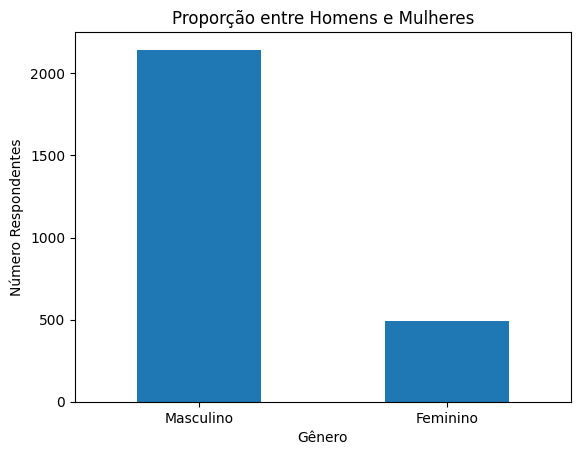

In [28]:
# Fazer gráfico com valor normalizado ou não?
# Ajustar cores das barras pra padronizar mulheres sempre como laranja e homens sempre como azul
# (ou definir outras cores)
df['Genero'].value_counts().plot(kind='bar',
                                 ylabel='Número Respondentes',
                                 xlabel='Gênero',
                                 title='Proporção entre Homens e Mulheres',
                                 rot=0)
plt.show()

- 81,06% dos respondentes se identificaram como homens
- 18,64% como mulheres
- 0,30% como 'outros'

A diferença entre homens e mulheres na pesquisa é alta e muito diferente da proporção geral da população, em torno de 50% pra cada gênero. Essa diferença pode se dever a um viés de coleta dos dados, já mencionado anteriormente.
Apesar disso, mesmo tendo algum viés de amostragem, é possivelmente representativo da área de Ciência de Dados. Áreas de TI possuem uma disparidade de gêneros, com alta concentração masculina no mercado de trabalho.

- Genero "Outros" foi filtrado dos gráficos de histograma e boxplot devido a baixa amostragem.

<Axes: xlabel='Idade', ylabel='Count'>

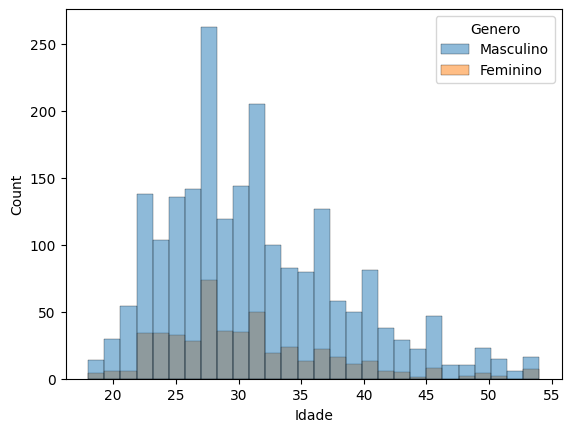

In [6]:
# sns.barplot(df_col_fitro, cmap='viridis', annot=True)
idade_genero = df.loc[df['Genero']!='Outro', ['Idade', 'Genero']]

sns.histplot(idade_genero,
             x="Idade", hue="Genero",
             linewidth = 0.2)

<Axes: xlabel='Idade', ylabel='Genero'>

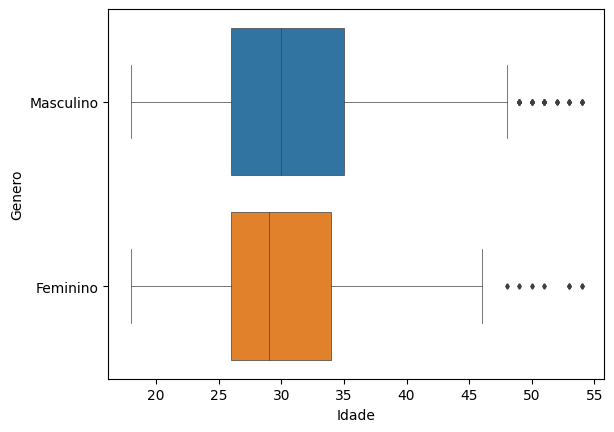

In [7]:
sns.boxplot(idade_genero,
            x='Idade', y='Genero',
            linewidth = 0.5,
            fliersize=2.5)

In [8]:
df['Idade'].describe()

count    2645.000000
mean       31.144802
std         7.093751
min        18.000000
25%        26.000000
50%        30.000000
75%        35.000000
max        54.000000
Name: Idade, dtype: float64

Variação de idade entre homens e mulheres, apesar da diferença na proporção dos gêneros, mostra uma tendência semelhante, e provavelmente não há diferenças significativas estatisticamente.

Os dois gêneros apresentam maior representatividade nas faixas etárias mais novas, tendo o intervalo interquartil entre 26 e 35 anos e média de 31,14 anos.

- Região onde mora

In [9]:
df['Regiao onde mora'].value_counts(normalize=True)

Sudeste         0.631758
Sul             0.151229
Nordeste        0.113800
Centro-oeste    0.069565
Exterior        0.020038
Norte           0.013611
Name: Regiao onde mora, dtype: float64

<Axes: xlabel='Regiao onde mora', ylabel='count'>

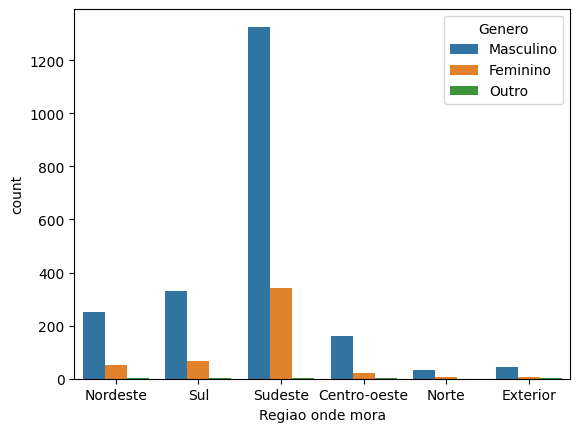

In [10]:
sns.countplot(df, x="Regiao onde mora", hue="Genero")

A maior concentração de respondentes mora no Sudeste (63,18%), seguida pelas regiões Sul e Nordeste (15,12% e 11,38% respectivamente). A região Centro-Oeste possui 6,96% dos residentes. A região Norte ficou atrás até mesmo dos residentes no exterior (Norte: 1,36%, exterior: 2,00%)
Vários fatores podem contribuir pra esse acúmulo de moradores da região Sudeste. Uma maior concentração de empresas e sede de empresas nessa região, bem como uma maior concentração populacional nessa região comparado com as demais.
Seria interessante como análise futura, fazer uma comparação com a proporção das populações entre diferentes regiões do Brasil. Isso provavelmente deve evidenciar uma subrepresentação de várias regiões na amostragem e superrepresentação da região Sudeste.

Quanto a diferença entre gêneros, não é possível verificar uma diferença clara entre os 2 gêneros, ambos seguindo um padrão semelhante.

- Salário

<Axes: xlabel='count', ylabel='Faixa salarial'>

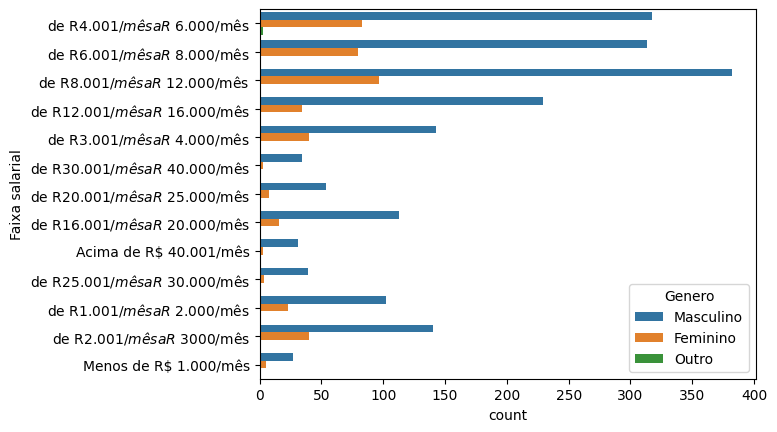

In [11]:
sns.countplot(df, y="Faixa salarial", hue="Genero")

## Escolaridade entre homens e mulheres

### Nível geral de escolaridade

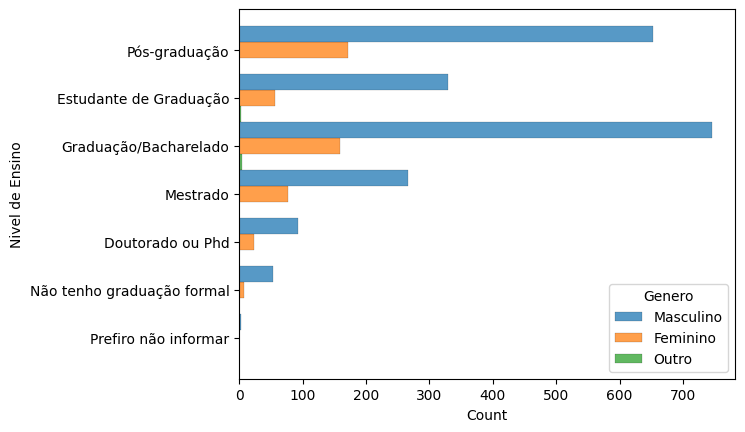

In [12]:
# Histograma Escolaridade
g = sns.histplot(df,
             y="Nivel de Ensino", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)
sns.move_legend(g, "lower right")

## Índice de Empregados x Desempregados entre entrevistados

### Histograma comparativo de empregados x desempregados com a situação especificada

<Axes: xlabel='Count', ylabel='Qual sua situação atual de trabalho?'>

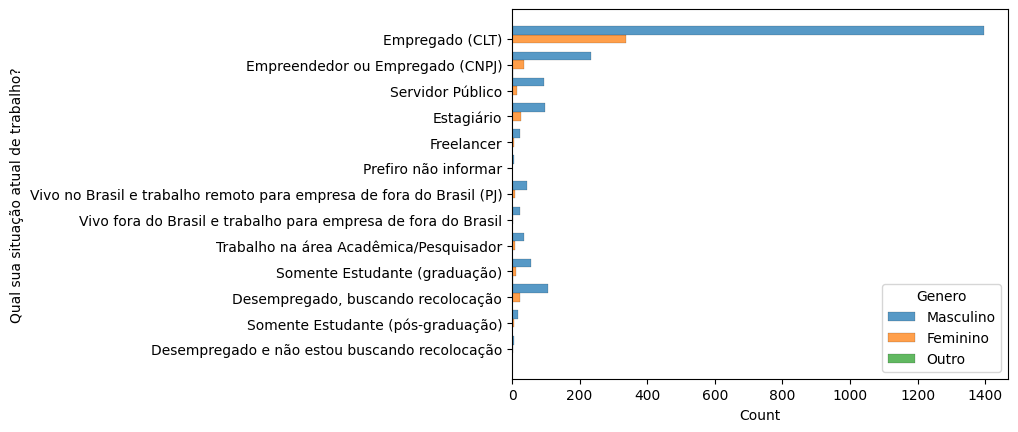

In [13]:
# Histograma comparativo de empregados x desempregados com funções discriminadas 
sns.histplot(df,
             y="Qual sua situação atual de trabalho?", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

### Histograma comparativo de empregados x desempregados com a situação generalizada

<Axes: xlabel='Count', ylabel='Situação'>

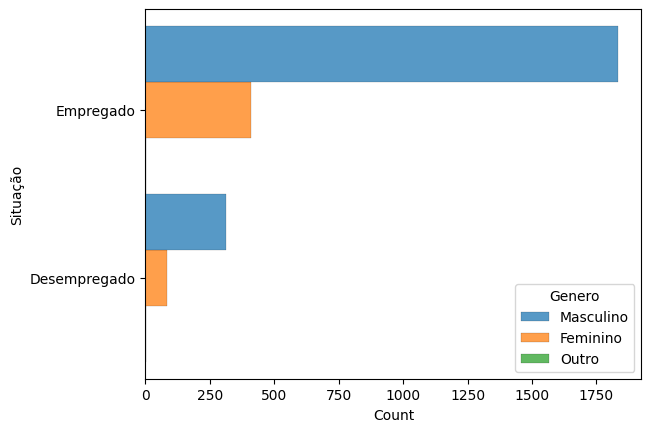

In [14]:
# Histograma comparativo de empregados x desempregados com funções geral 

empregado = ['Empregado (CLT)','Empreendedor ou Empregado (CNPJ)','Servidor Público',
 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)',
 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil',
 'Trabalho na área Acadêmica/Pesquisador']

def verifica_valor(valor):
    if valor in empregado:
        return 'Empregado'
    else:
        return 'Desempregado'
    
# Aplicar a função para criar a nova coluna 'Situação'

df['Situação'] = df['Qual sua situação atual de trabalho?'].apply(verifica_valor)

# Histograma EmpregadosxDesempregados geral
sns.histplot(df,
             y="Situação", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

## Ocupação de cargos entre homens e mulheres

### Cargos operacionais

<Axes: xlabel='Count', ylabel='Cargo Atual'>

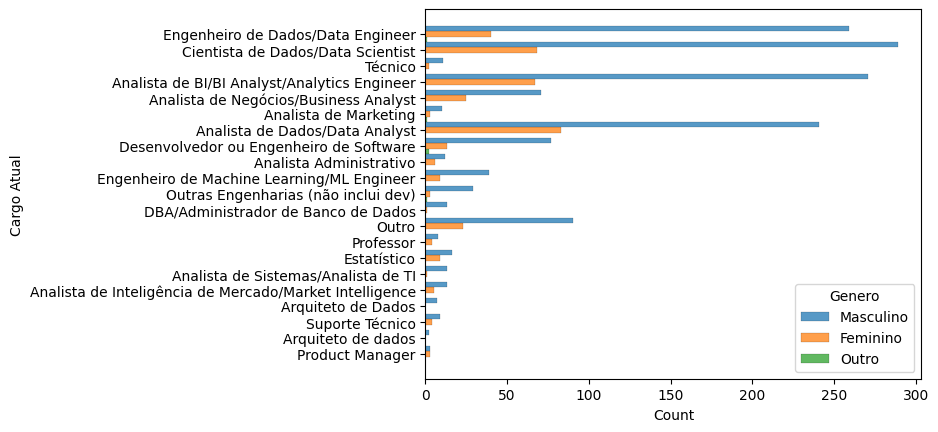

In [15]:
# Histograma de ocupação de cargos operacionais
df_cargos = df.loc[df['Cargo Atual']!='NdA']
sns.histplot(df_cargos,
             y="Cargo Atual", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

### Cargos de gestão 

<Axes: xlabel='Count', ylabel='Cargo como Gestor'>

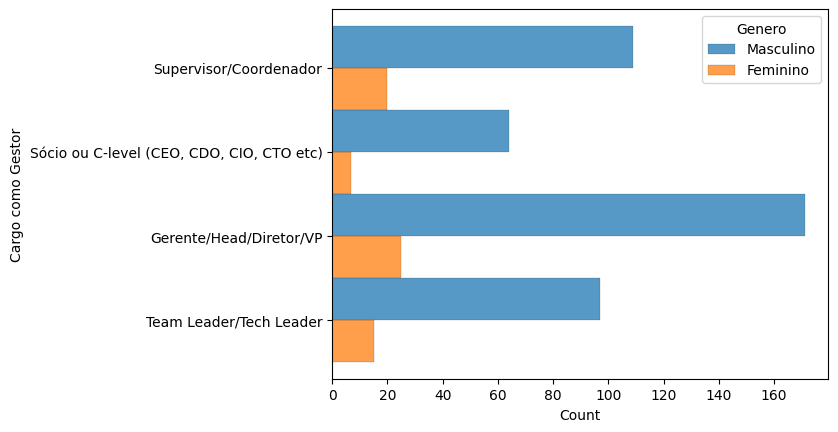

In [16]:
# Histograma de ocupação de cargos de gestão
df_gestor = df.loc[df['Cargo como Gestor']!='NdA']
sns.histplot(df_gestor,
             y="Cargo como Gestor", hue="Genero",
             multiple="dodge",
             linewidth = 0.1)

## Insatisfação com a empresa onde trabalha atualmente.

### Nível geral de insatisfação

In [17]:
# Dividindo dataset para uso nas análises.

df_fem = df.loc[df['Genero'] == 'Feminino']
df_masc = df.loc[df['Genero'] == 'Masculino']
df_outros = df.loc[df['Genero'] == 'Outro']


In [18]:
# Configurações visuais

FONTE = "Arial"

COR_FEM = 'rgb(252, 171, 78)'
COR_MASC = 'rgb(85, 183, 224)'

COR_FONTE = 'rgb(84, 3, 117)'

paleta = ['rgb(85, 183, 224)', 
        'rgb(252, 171, 78)',
        'rgb(255, 235, 183)',
        'rgb(173, 142, 112)',]


In [19]:
title={'text': 'Você está satisfeito com sua empresa atual?',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top'}

fonte = {'family': FONTE,
        'size': 20,
        'color': COR_FONTE}

# Satisfeitos = 1.0
# Insatisfeitos = 0.0

sat_fem = len(df_fem.loc[df_fem['Você está satisfeito na sua empresa atual?'] == 1.0])
insat_fem = len(df_fem.loc[df_fem['Você está satisfeito na sua empresa atual?'] == 0.0])

sat_masc = len(df_masc.loc[df_masc['Você está satisfeito na sua empresa atual?'] == 1.0])
insat_masc = len(df_masc.loc[df_masc['Você está satisfeito na sua empresa atual?'] == 0.0])

labels = ['Satisfeitos','Insatisfeitos']
values_f = [sat_fem , insat_fem]
values_m = [sat_masc, insat_masc]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Mulheres', 'Homens'])

fig.add_trace(go.Pie(labels=labels, values=values_f, name='Nível de satisfação com a empresa entre mulheres'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_m, name='Nível de satisfação com a empresa entre homens'), 1, 2)
fig.update_layout(title=title, width=1500, height=600, font=fonte)
fig.update_traces(textfont_size=20, marker_colors=paleta)

fig.show()

### Principais motivos de insatisfação.

Valores proporcionais para cada alternativa calculados usando a quantidade de insatisfeitos por gênero.

In [20]:
columns = ['Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa']

labels = ['Falta de oportunidade de crescimento',
 'Salário não corresponde ao mercado',
 'Não tenho uma boa relação com meu gestor',
 'Gostaria de trabalhar em em outra área',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa']

values_fem = []
values_masc = []

# Coluna assinalada = 1.0
# Coluna não assinalada = 0.0

for column in columns:  
    values_fem.append(
        df_fem.loc[
            df_fem[column]>=0, [column]].value_counts(normalize=True, sort=False)[1.0]
        )
    values_masc.append(
        df_masc.loc[
            df_masc[column]>=0, [column]].value_counts(normalize=True, sort=False)[1.0]
        )
    
fig = go.Figure()


title={'text': 'Motivos de insatisfação com a empresa atual.',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top'}

fonte = {'family': FONTE,
        'size': 15,
        'color': COR_FONTE}

fig.add_trace(go.Bar(
    x=labels,
    y=values_fem,
    xaxis='x2', 
    yaxis='y2',
    name='Mulheres',
    marker_color=COR_FEM
))

fig.add_trace(go.Bar(
    x=labels,
    y=values_masc,
    xaxis='x2', 
    yaxis='y2',
    name='Homens',
    marker_color=COR_MASC
))

fig['layout']['yaxis2'] = {}

fig.layout.yaxis2.update({'title': 'Valor proporcional'})
fig.layout.margin.update({'t':100, 'l':100})

fig.update_layout(title=title, barmode='group', xaxis_tickangle=-45)
fig.update_layout(width=1500, height=800, font=fonte)

fig.update_layout(uniformtext_minsize=20)
fig.show()

### Insatisfação x tempo de trabalho

Valores proporcionais para cada faixa de tempo de trabalho, calculados utilizando as linhas relativas a participantes insatisfeitos.

In [21]:
# Satisfeitos = 1.0
# Insatisfeitos = 0.0

insat_fem = df_fem.loc[df_fem[
                        'Você está satisfeito na sua empresa atual?'] == 0.0, 
                       ['Quanto tempo de experiência na área de dados você tem?']].value_counts(normalize=True, sort=False)

insat_masc = df_masc.loc[df_masc[
                        'Você está satisfeito na sua empresa atual?'] == 0.0, 
                         ['Quanto tempo de experiência na área de dados você tem?']].value_counts(normalize=True, sort=False)

lista_dados = insat_fem.reset_index()['Quanto tempo de experiência na área de dados você tem?'].unique().tolist()


fig = go.Figure(data=[
    go.Bar(x=lista_dados, y=insat_masc, name='Homens', marker_color=COR_MASC),
    go.Bar(x=lista_dados, y=insat_fem, name='Mulheres', marker_color=COR_FEM)
    
])

title={'text': 'Insatisfeitos com a empresa separados por tempo de trabalho',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top'}

fonte = {'family': FONTE,
        'size': 15,
        'color': COR_FONTE}

fig.update_layout(width=1500, height=800, font=fonte, xaxis_tickangle=-45)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, title=title)
fig.layout.margin.update({'t':100, 'l':100})
fig.show()

#### Insatisfação x modalidade de trabalho

In [22]:
fem = df_fem.loc[df_fem[
                        'Você está satisfeito na sua empresa atual?'] >= 0.0, 
                       ['Atualmente qual a sua forma de trabalho?', 'Você está satisfeito na sua empresa atual?']]
masc = df_masc.loc[df_masc[
                        'Você está satisfeito na sua empresa atual?'] >= 0.0, 
                         ['Atualmente qual a sua forma de trabalho?', 'Você está satisfeito na sua empresa atual?']]

labels = ['Modelo 100% presencial',
          'Modelo híbrido flexível',
          'Modelo 100% remoto',
          'Modelo híbrido com dias fixos presenciais'
          ]

columns = fem['Atualmente qual a sua forma de trabalho?'].unique().tolist()

sat_fem = []
insat_fem = []
sat_masc = []
insat_masc = []

for column in columns:
    sat_fem.append(fem.loc[fem['Atualmente qual a sua forma de trabalho?'] == column, ['Você está satisfeito na sua empresa atual?']].value_counts(normalize=True)[1.0])
    insat_fem.append(fem.loc[fem['Atualmente qual a sua forma de trabalho?'] == column, ['Você está satisfeito na sua empresa atual?']].value_counts(normalize=True)[0.0])
    sat_masc.append(masc.loc[masc['Atualmente qual a sua forma de trabalho?'] == column, ['Você está satisfeito na sua empresa atual?']].value_counts(normalize=True)[1.0])
    insat_masc.append(masc.loc[masc['Atualmente qual a sua forma de trabalho?'] == column, ['Você está satisfeito na sua empresa atual?']].value_counts(normalize=True)[0.0])


fig = go.Figure()
fig = make_subplots(rows=2, cols=1, subplot_titles=['Mulheres', 'Homens'])

title={'text': 'Insatisfeitos com a empresa separados por modalidade de trabalho',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top'}

fonte = {'family': FONTE,
        'size': 15,
        'color': COR_FONTE}

# Mulheres    
fig.add_trace(go.Bar(
    x=labels,
    y=insat_fem,
    name='Inatisfeitas',
    marker_color=COR_FEM
    ),1, 1
)

fig.add_trace(go.Bar(
    x=labels,
    y=sat_fem,
    name='Satisfeitas',
    marker_color='rgb(255, 235, 183)'
    ),1, 1
)

#Homens

fig.add_trace(go.Bar(
    x=labels,
    y=insat_masc,
    name='Insatisfeitos',
    marker_color=COR_MASC
    ), 2, 1
)

fig.add_trace(go.Bar(
    x=labels,
    y=sat_masc,
    name='Satisfeitos',
    marker_color='rgb(255, 235, 183)'
    ), 2, 1
)

fig.update_layout(barmode="relative", title=title, font=fonte)
fig.update_layout(height=800, width=1200, title_text="Níveis de insatisfação por modalidade de trabalho")
fig.show()

### Forma de trabalho ideal

In [23]:
fig = make_subplots(rows=2, cols=1)
labels = [
          'Modelo híbrido com dias fixos presenciais',
          'Modelo híbrido flexível',
          'Modelo 100% remoto',
          'Modelo 100% presencial',
        ]

fig.add_trace(
    go.Bar(
            x=df_fem['Qual a forma de trabalho ideal para você?'].value_counts(sort=False),
            y=labels,
            textposition="inside",
            orientation='h', 
            name='Mulheres',
            marker_color=COR_FEM
            ), row=1, col=1
)

fig.add_trace(
    go.Bar(
            x=df_masc['Qual a forma de trabalho ideal para você?'].value_counts(sort=False),
            y=labels,
            textposition="none",
            orientation='h', 
            name='Homens', marker_color=COR_MASC
            ), row=2, col=1
)

fig.update_layout(height=600, width=1400, 
                  title_text="Forma de trabalho ideal",
                  font=fonte,
                  )
fig.show()